In [9]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [10]:
with open(os.path.join('data', 'structures_df2_calc_with_bands_be.json')) as fhandle:
        df2 = json.load(fhandle)
with open(os.path.join('data', 'structures_rvv10_calc_with_bands_be.json')) as fhandle:
        rvv10 = json.load(fhandle)
with open(os.path.join('data', 'structures_revpbe_calc_with_bands_be.json')) as fhandle:
        revpbe = json.load(fhandle)

***Generate the DataFrame only based on vdW-DF2***

In [23]:
uuids = []
structures = []
cells = []
volumes = []
relevant_dimension_of_highest_dimensionality_substructures = []
binding_energy_per_substructures = []
binding_energies = []
labels = []
number_of_atoms_in_bulks = []
number_of_highest_dimensionality_substructures_in_bulks = []
sub_structure_spgs = []
sub_structure_dims = []
energy_bulks = []
sub_structure_formulas = []
i = 0
for key in df2.keys():
    try:
        path = 'data/structures/structures_3D_xsf/'

        folder = os.fsencode(path)
        
        filename = key + '.xsf'
    
        with open(path + filename) as f:
            structure = ase.io.xsf.read_xsf(f, index=- 1, read_data=False)
        
        
        
        relevant_dimension_of_highest_dimensionality_substructures.append(df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        uuids.append(key)
        cells.append(df2[key]['cell'])
        volumes.append(df2[key]['volume'])
        binding_energy_per_substructures.append(df2[key]['binding_energy']['binding_energy_per_substructure'])
        tmp = ( -1000. *
                    df2[key]['binding_energy']['binding_energy_per_substructure']/
                    df2[key]['binding_energy']['relevant_dimension_of_highest_dimensionality_substructure'])
        binding_energies.append(tmp)
        
        if tmp <= 30:
            labels.append('EE')
        elif 30 < tmp <= 130:
            labels.append('PE')
        else:
            labels.append('HBE')
        
        structures.append(structure)        
        number_of_atoms_in_bulks.append(df2[key]['binding_energy']['number_of_atoms_in_bulk'])
        number_of_highest_dimensionality_substructures_in_bulks.append(df2[key]['binding_energy']['number_of_highest_dimensionality_substructures_in_bulk'])
        sub_structure_spgs.append(df2[key]['binding_energy']['sub_structure_spg'])
        sub_structure_dims.append(df2[key]['binding_energy']['sub_structure_dim'])
        energy_bulks.append(df2[key]['binding_energy']['energy_bulk'])
        sub_structure_formulas.append(df2[key]['binding_energy']['sub_structure_formulas'])
    except KeyError:
        continue
    except FileNotFoundError:
        i += 1

print('Number of missing structures:', i)

data_df2 = {
    'uuid' : uuids,
    'structure' : structures,
    'cell' : cells,
    'volume' : volumes,
    'relevant_dimension_of_highest_dimensionality_substructure' : relevant_dimension_of_highest_dimensionality_substructures,
    'binding_energy_per_substructure' : binding_energy_per_substructures,
    'binding_energy' : binding_energies,
    'label' : labels,
    'number_of_atoms_in_bulk' : number_of_atoms_in_bulks,
    'number_of_highest_dimensionality_substructures_in_bulk' : number_of_highest_dimensionality_substructures_in_bulks,
    'sub_structure_spg' : sub_structure_spgs,
    'sub_structure_dim' : sub_structure_dims,
    'energy_bulk' : energy_bulks,
    'sub_structure_formula' : sub_structure_formulas
}

dataframe_df2 = pd.DataFrame(data_df2)

Number of missing structures: 105


In [19]:
dataframe_df2.head()

,uuid,structure,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula
0,dec2d070-d2ad-41f3-b742-786368ade33a,"(Atom('Cd', [-0.0, -0.0, 29.0441583], index=0)...","[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]"
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"(Atom('Fe', [0.0, 0.0, 0.0], index=0), Atom('C...","[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe]
2,527e7b32-d211-4743-9631-120122819190,"(Atom('Er', [2.1386, 4.301805, 3.209025], inde...","[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6]
3,37bf14b1-6529-436c-a519-e1ad9b208784,"(Atom('Ba', [0.0, 0.0, 9.5697], index=0), Atom...","[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg]
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"(Atom('Ba', [0.0, 2.414, 1.49473], index=0), A...","[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2]


<AxesSubplot:xlabel='volume'>

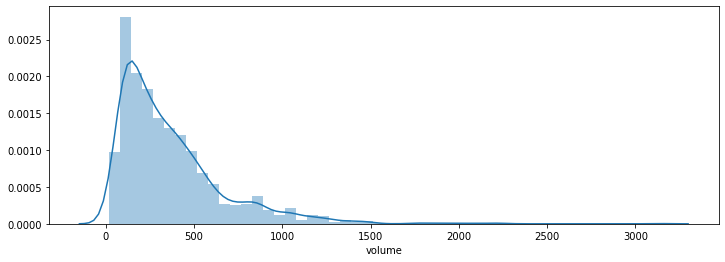

In [20]:
plt.figure(figsize = (12,4))
sns.distplot(dataframe_df2['volume'])

<AxesSubplot:xlabel='label', ylabel='count'>

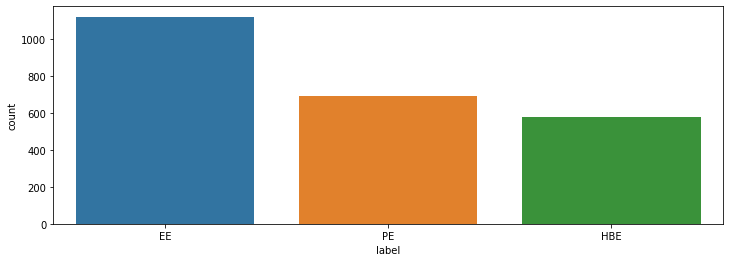

In [21]:
plt.figure(figsize = (12,4))
sns.countplot(dataframe_df2['label'])

<AxesSubplot:>

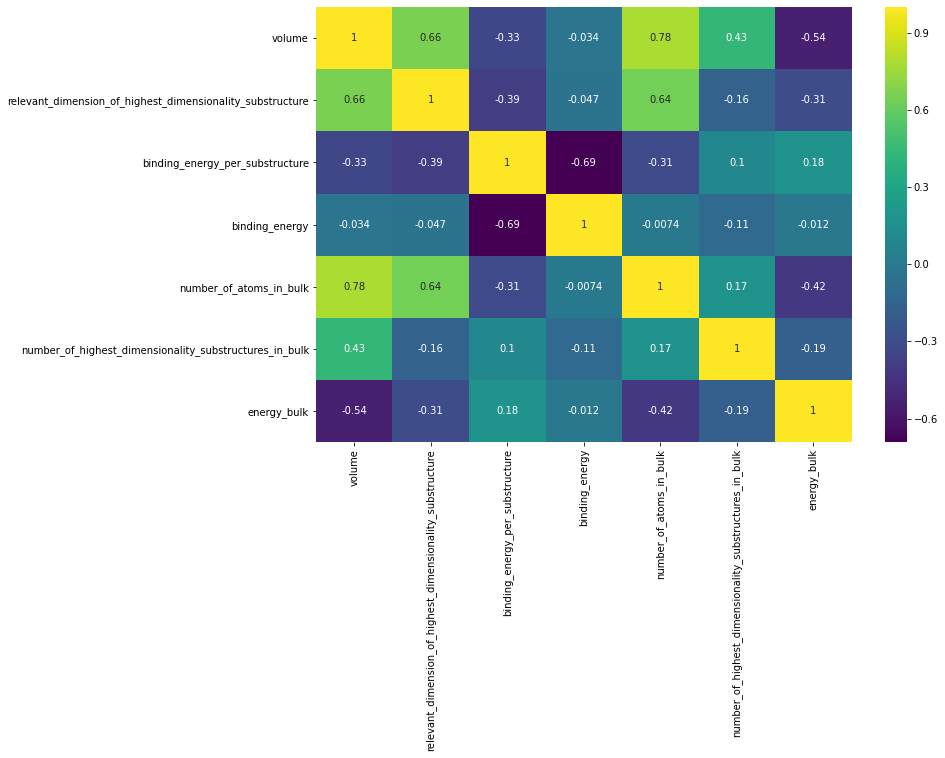

In [24]:
plt.figure(figsize = (12,8))
sns.heatmap(dataframe_df2.corr(), annot = True, cmap = 'viridis')

In [25]:
from matminer.featurizers.conversions import ASEAtomstoStructure

In [26]:
aa2s = ASEAtomstoStructure()
dataframe_df2 = aa2s.fit_featurize_dataframe(dataframe_df2, col_id= 'structure', ignore_errors=True)

ASEAtomstoStructure:   0%|          | 0/2392 [00:00<?, ?it/s]

In [27]:
dataframe_df2.to_pickle("DataFrame_df2.pkl")

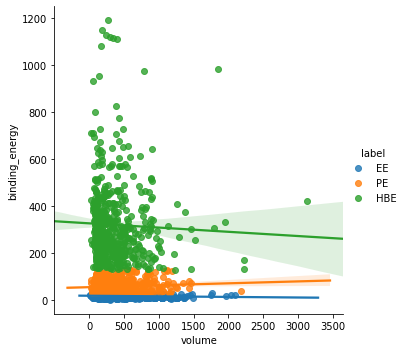

In [28]:
sns.lmplot(x = 'volume', y = 'binding_energy', data = dataframe_df2[dataframe_df2['binding_energy'] < 2000] , hue = 'label')

<AxesSubplot:xlabel='volume'>

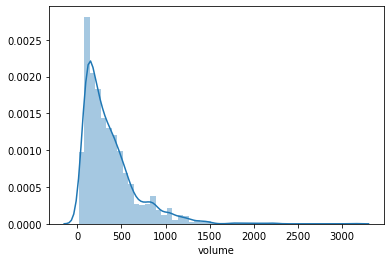

In [29]:
sns.distplot(dataframe_df2[dataframe_df2['binding_energy'] < 2000]['volume'] )

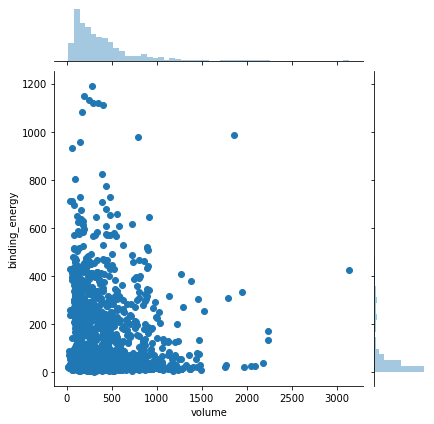

In [30]:
sns.jointplot(x = 'volume', y = 'binding_energy', data = dataframe_df2[dataframe_df2['binding_energy'] < 2000], kind= 'scatter')

In [53]:
dataframe_df2.columns

Index(['uiid', 'structure', 'cell', 'volume',
       'relevant_dimension_of_highest_dimensionality_substructure',
       'binding_energy_per_substructure', 'binding_energy', 'label',
       'number_of_atoms_in_bulk',
       'number_of_highest_dimensionality_substructures_in_bulk',
       'sub_structure_spg', 'sub_structure_dim', 'energy_bulk',
       'sub_structure_formula', 'PMG Structure from ASE Atoms'],
      dtype='object')